# Challenge

#### LTI
Implement discrete time LTI using state space form.

$\dot{x}(t) = Ax(t) + Bu(t)\;\;\;$ State equation.

$y(t) = Cx(t) + Du(t)\;\;\;$ Output equation.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# LTI Class
class StateSpace:
    def __init__(self, states, inputs, outputs):
        self.num_x = states
        self.num_u = inputs
        self.num_y = outputs
        
        self.x = np.zeros((self.num_x,1))
        
        self.A = np.zeros((self.num_x, self.num_x))
        self.B = np.zeros((self.num_x, self.num_u))
        self.C = np.zeros((self.num_y, self.num_x))
        self.D = np.zeros((self.num_y, self.num_u))
        
    def run(self, u,dt):
        x_dot = np.matmul(self.A,self.x) + np.matmul(self.B, u)
        y = np.matmul(self.C, self.x) + np.matmul(self.D, u)
        
        self.x = x_dot*dt
        return y

### PID
Implement PID in discrete time LTI form.

In [189]:
# PID
class PID:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.integral = 0
        self.prev_error = 0
        
    def run(self, e, dt):
        output = self.kp*e
        self.integral += e*dt
        output += self.ki*self.integral
        output += self.kd*(e - self.prev_error)/dt
        self.prev_error = e
        
        return output

### Closed Loop System
Create a function that takes two discrete time LTI systems and returns a negative closed loop system.

In [180]:
class ClosedLoop:
    def __init__(self, s1, s2):
        self.s1 = s1
        self.s2 = s2
        self.feedback = 0
        
    def run(self, r, dt):
        e = r - self.feedback
        #print("Error " + str(e))
        s1_output = s1.run(e,dt)
        #print("s1 output " + str(s1_output))
        s1_output = np.array([[s1_output]])
        s2_output = s2.run(s1_output,dt)
        #print("s2 output " + str(s2_output))
        self.feedback = s2_output[0][0]
        #print("x " + str(s2.x) + "\n")
        return s2_output[0][0]

### Testing

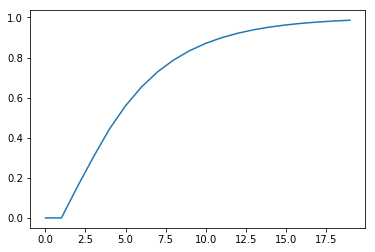

In [195]:
s1 = PID(0,10,0)
s2 = StateSpace(2,1,1)
s2.A[0,0] = 0
s2.A[0,1] = 1
s2.A[1,0] = -1
s2.A[1,1] = -0.2

s2.B[0,0] = 0
s2.B[1,0] = 1

s2.C[0,0] = 1

closed_loop = ClosedLoop(s1,s2)

x = []
for i in range(20):
    x += [closed_loop.run(1,.25)]
    
plt.plot(x)
plt.show()

### Kalman Decomposition